# Проект: Автоматизация.

# Цель проекта:


- Анализ взаимодействия пользователей с карточками Яндекс.Дзен.
- Построение дашборда по полученным данным.
- Подготовка презентации.

## При помощи дашборда ответить на следующие вопросы:

- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?

### Структура данных:


- `record_id` - первичный ключ,
- `item_topic` - тема карточки,
- `source_topic` - тема источника,
- `age_segment` - возрастной сегмент,
- `dt` - дата и время,
- `visits` - количество событий.

## Шаг 1. Изучение данных.

In [37]:
# импортируем библиотеки

import pandas as pd # импортируем библиотеку pandas
from matplotlib import pyplot as plt #  импортируем библиотеку pyplot
from matplotlib import font_manager as fm #  импортируем библиотеку font_manager
import math as mth #  импортируем библиотеку math
import plotly.express as px # импортируем библиотеку plotly
from plotly import graph_objects as go # импортируем библиотеку graph_objects
import seaborn as sns # импортируем библиотеку seaborn
from sqlalchemy import create_engine # импортируем библиотеку sqlalchemy


In [38]:

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [39]:
# Для того чтобы сконнектится к базе данных и получить данные из переменной engine
# выполним следующий SQL - запрос
query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [40]:
dash_visits # выводим на экран полученные данные

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


In [41]:
dash_visits.info() # вывод основной информации о датафрейме.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


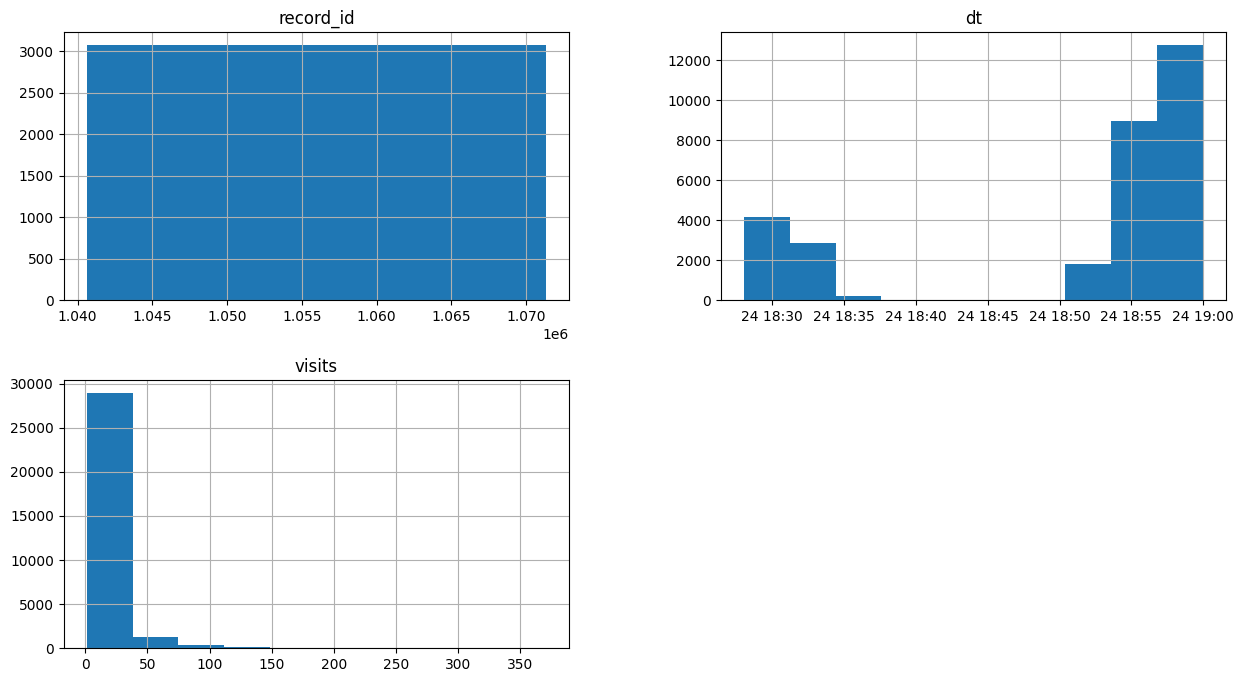

In [42]:
dash_visits.hist(figsize=(15,8)); # выводим на экран гистограммы 

<div style="border:solid Blue 2px; padding: 40px">

### ОБЩИЕ ВЫВОДЫ ПО ШАГУ 1:

1. Мы загрузили все необходимые нам библиотеки.
2. Изучили предоставленный нам датафрейм.
3. В датафрейме всего - 6 столбцов и 30745 строк.
4. Количество выведенных гистограмм - 3.

    </div>

## Шаг 2. Предобработка и краткий  Анализ данных.

In [43]:
# кол-во NaN значений
display("Количество пропущенных значений в таблице равно:", dash_visits.isna().sum()) 
print()
# кол-во дубликатов
display("Суммарное количество явных дубликатов: {}".format(dash_visits.duplicated().sum()))

'Количество пропущенных значений в таблице равно:'

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

'Суммарное количество явных дубликатов: 0'

In [44]:
dash_visits['item_topic'].unique() # Темы карточек

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

In [45]:
# количество тем карточек
print('Общее количество тем карточек:', dash_visits['item_topic'].nunique())

Общее количество тем карточек: 25


In [46]:
# общее количество событий по темам карточек
dash_visits['item_topic'].value_counts() 

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

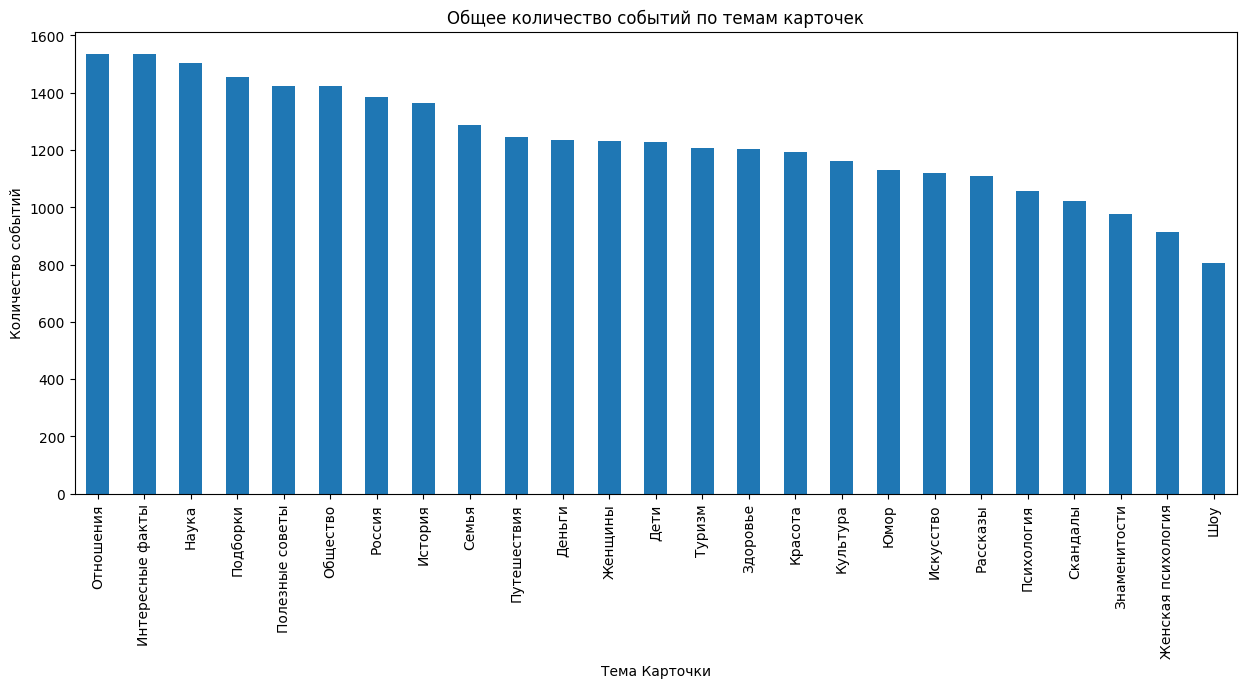

In [47]:
# общее количество событий по темам карточек
dash_visits['item_topic'].value_counts().plot(kind='bar', figsize = (15,6),\
                                  title = 'Общее количество событий по темам карточек',\
                                  xlabel = 'Тема Карточки', ylabel = 'Количество событий');

Как видим, наиболее актуальные темы карточек это:

- Отношения
- Интересные факты
- Наука
- Подборки
- Полезные советы

In [48]:
dash_visits['source_topic'].unique() # Темы источников

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

In [49]:
# количество тем источников
print('Общее количество тем источников:', dash_visits['source_topic'].nunique())

Общее количество тем источников: 26


In [50]:
# общее количество событий по темам источников
dash_visits['source_topic'].value_counts() 

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

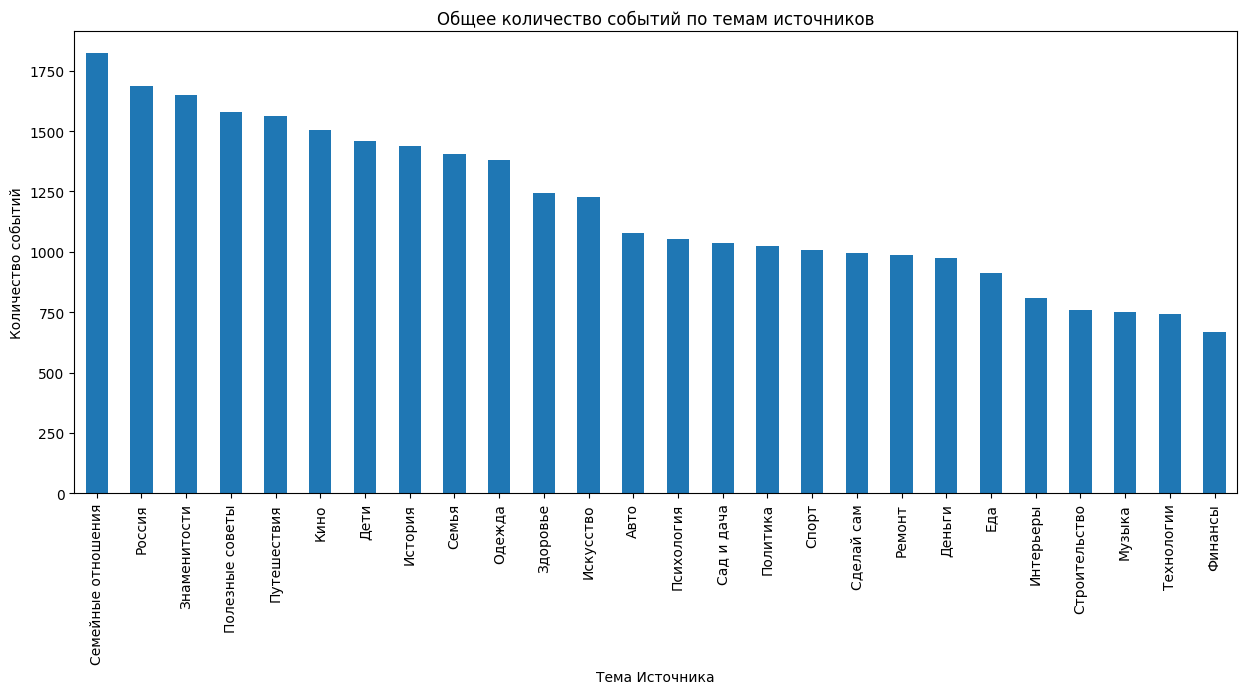

In [51]:
# общее количество событий по темам источников
dash_visits['source_topic'].value_counts().plot(kind='bar', figsize = (15,6),\
                                  title = 'Общее количество событий по темам источников',\
                                  xlabel = 'Тема Источника', ylabel = 'Количество событий');

Как видим, наиболее актуальные темы источников это:

- Семейные отношения
- Россия
- Знаменитости
- Полезные советы
- Путешествия

In [52]:
dash_visits['age_segment'].unique() # количество возрастных групп

array(['18-25', '26-30', '31-35', '36-40', '41-45', '45+'], dtype=object)

In [53]:
# количество возрастных групп
print('Общее количество возрастных групп:', dash_visits['age_segment'].nunique())

Общее количество возрастных групп: 6


In [54]:
# общее количество событий по возрастным группам
dash_visits['age_segment'].value_counts() 

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

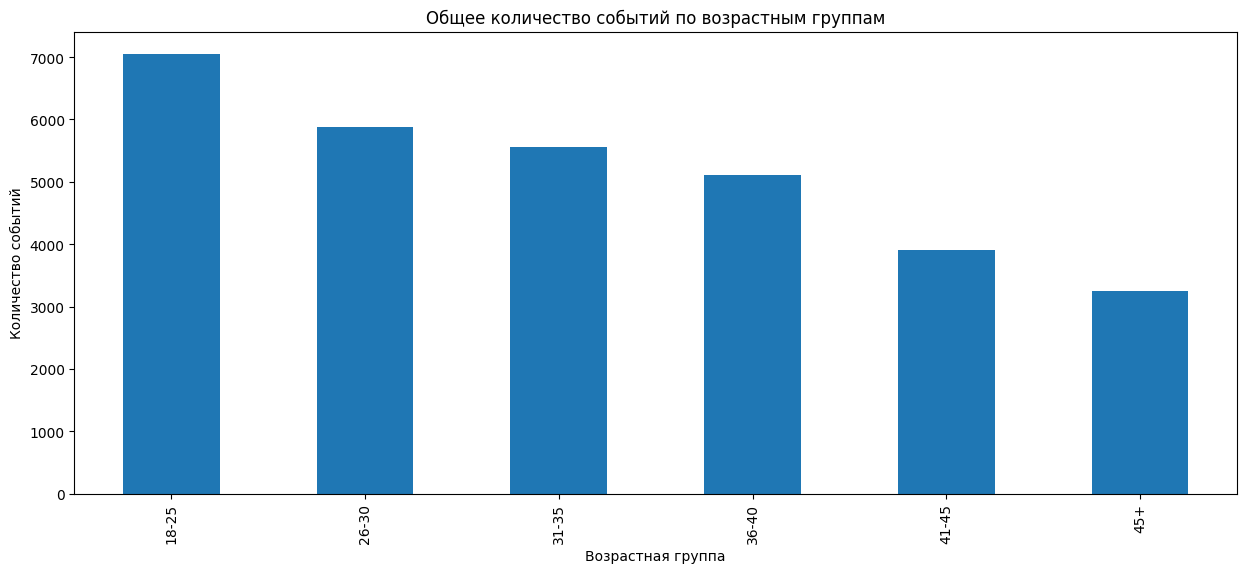

In [55]:
# общее количество событий по возрастным группам
dash_visits['age_segment'].value_counts().plot(kind='bar', figsize = (15,6),\
                                  title = 'Общее количество событий по возрастным группам',\
                                  xlabel = 'Возрастная группа', ylabel = 'Количество событий');

Как видим, наибольшее количество событий осуществляют следующие возрастные группы:

- 18-25 лет
- 26-30 лет
- 31-35 лет

In [56]:
dash_visits['dt'].unique() # временной диапазон событий

array(['2019-09-24T18:32:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:53:00.000000000', '2019-09-24T18:28:00.000000000',
       '2019-09-24T18:34:00.000000000'], dtype='datetime64[ns]')

In [57]:
# количество временных диапазонов
print('Общее количество временных диапазонов:', dash_visits['dt'].nunique())

Общее количество временных диапазонов: 17


In [58]:
# общее количество событий по временным диапазонам
dash_visits['dt'].value_counts() 

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

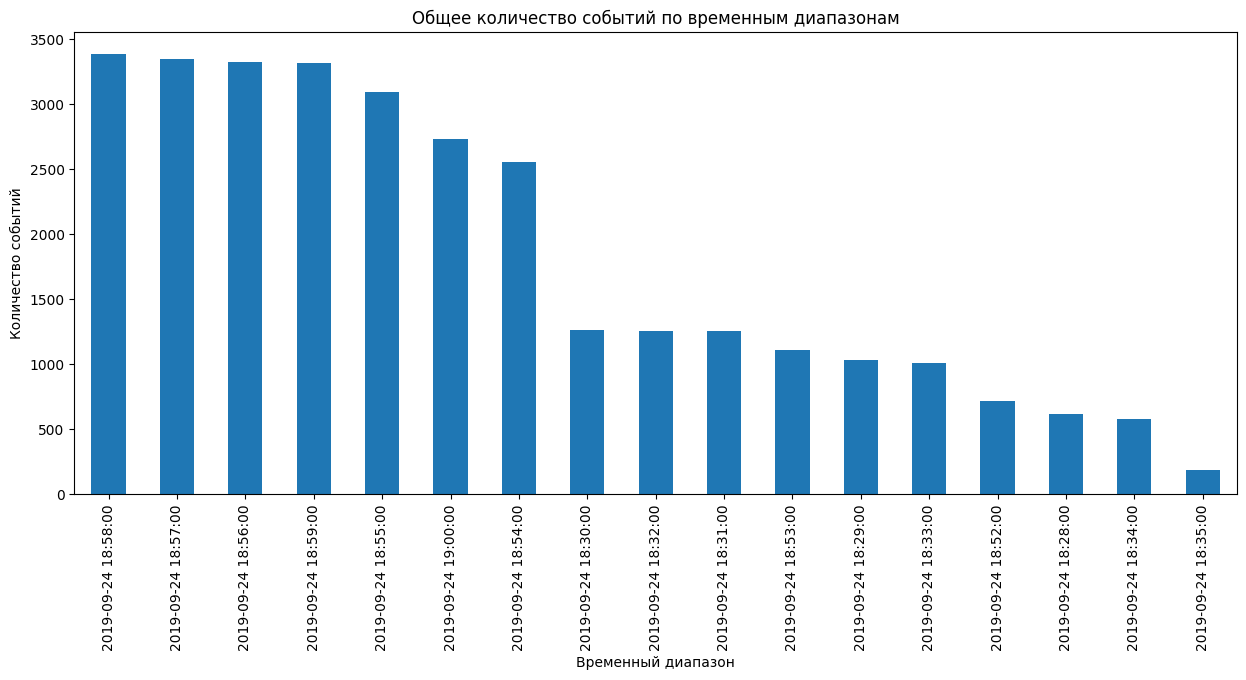

In [59]:
# общее количество событий по временным диапазонам
dash_visits['dt'].value_counts().plot(kind='bar', figsize = (15,6),\
                                  title = 'Общее количество событий по временным диапазонам',\
                                  xlabel = 'Временный диапазон', ylabel = 'Количество событий');

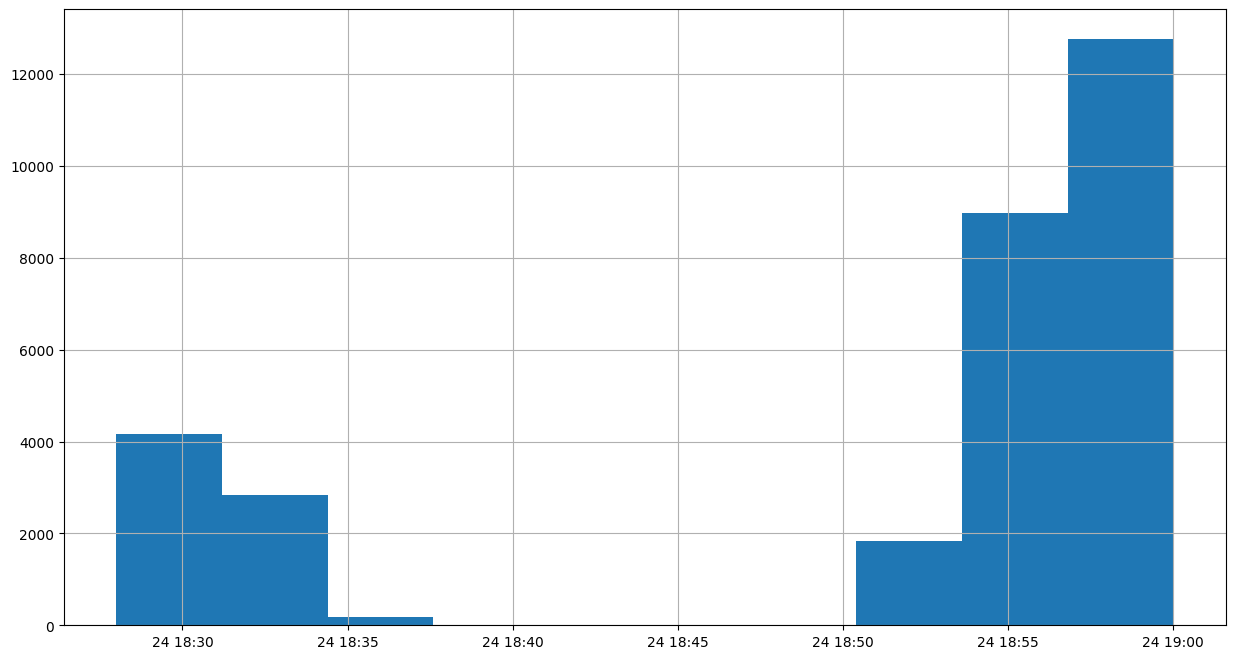

In [60]:
dash_visits['dt'].hist(figsize=(15,8)); # выводим гистограмму событий

Как видим, наибольшее количество событий произошли в временном диапазоне с 18:54 до 19:00

In [61]:
dash_visits['visits'].unique() # количество событий

array([  3,   1,   4,  17,  27,  22,  24,  20,   5,  13,  18,  15,  10,
         9,  14,  11,   6,   8,   7,   2,  23,  33,  66,  72,  71,  61,
        12,  25,  42,  30,  16,  21,  38,  43,  44,  19,  79,  74,  82,
        47,  46,  57,  29,  34,  31,  51,  98,  89,  41,  77,  96,  86,
        85,  35,  32,  36,  28,  60,  63,  55,  65, 101,  92,  95,  26,
        56,  49,  54,  69,  78,  75,  68,  50,  94, 119, 111,  53,  58,
        59,  45,  40, 165, 164, 136, 128,  48,  39,  52,  37,  88, 133,
       106, 108, 149, 169, 178, 153,  64,  70,  80,  83, 102,  90, 142,
       152, 182, 143,  73, 104,  62,  67, 121, 209, 228, 218, 183,  76,
       186, 200, 206, 219,  84, 185, 207, 100, 110, 105, 202, 184, 168,
       132, 126, 211, 197, 180, 113, 107, 115, 103, 141, 235, 177,  91,
       123, 135, 116, 125, 127,  97, 130, 114,  99,  87, 139, 145, 147,
       124, 137, 264, 276, 231, 112, 163, 138, 158, 160, 166, 155, 118,
        81, 120, 109, 173, 266, 331, 291, 324, 144, 190, 201, 21

In [62]:
# количество событий
print('Общее количество уникальных значений событий:', dash_visits['visits'].nunique())

Общее количество уникальных значений событий: 212


In [63]:
# общее количество уникальных значений событий
dash_visits['visits'].value_counts() 

1      8999
2      4304
3      2637
4      1879
5      1359
       ... 
168       1
231       1
135       1
246       1
207       1
Name: visits, Length: 212, dtype: int64

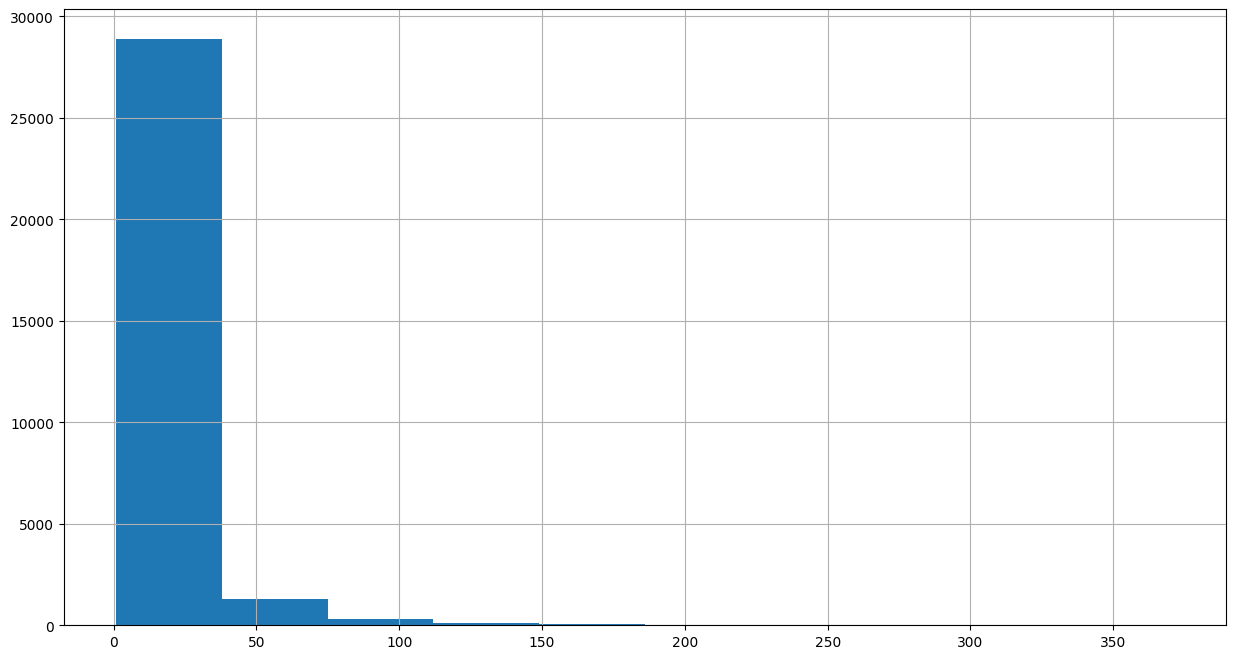

In [64]:
dash_visits['visits'].hist(figsize=(15,8)); # гистограмма количества событий

In [65]:
print('Максимальное количество событий равно:', dash_visits['visits'].max()) 

Максимальное количество событий равно: 371


In [66]:
print('Минимальное количество событий равно:', dash_visits['visits'].min()) 

Минимальное количество событий равно: 1


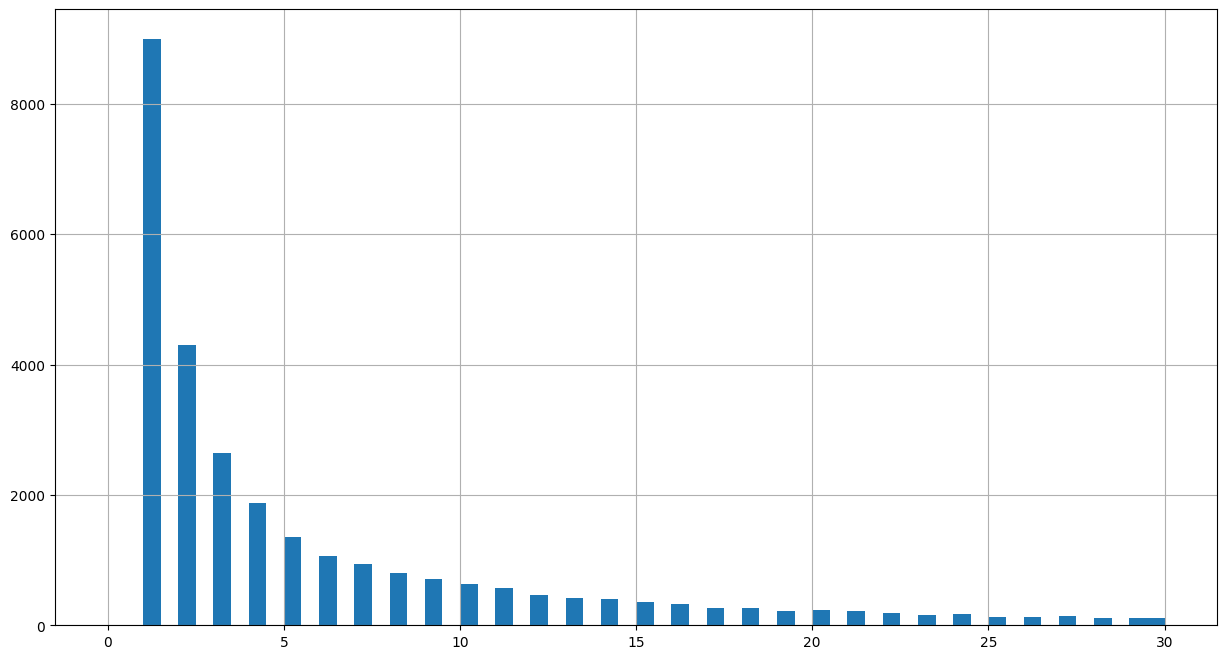

In [67]:
# увеличенная гистограмма количества событий 
dash_visits['visits'].hist(figsize=(15,8), range = (0,30), bins = 60); 

Как видим, наибольшее значение количества событий находится в диапазоне от 1 до 5.

In [68]:
# определяем как много карточек генерируют источники с разными темами
cnt_topic = dash_visits.groupby(by='source_topic').agg({'item_topic':'nunique'}).\
sort_values(by='item_topic', ascending= False).reset_index()
cnt_topic

,source_topic,item_topic
0,Авто,25
1,Одежда,25
2,Спорт,25
3,Семья,25
4,Семейные отношения,25
5,Россия,25
6,Ремонт,25
7,Путешествия,25
8,Психология,25
9,Деньги,25


In [69]:
# определяем сколько событий (визитов) генерируют источники с разными темами
cnt_visits = dash_visits.groupby(by='source_topic').agg({'visits':'sum'}).\
sort_values(by='visits', ascending= False).reset_index()
cnt_visits.columns = ['source_topic', 'visits']
cnt_visits

,source_topic,visits
0,Семейные отношения,33309
1,Россия,29831
2,Полезные советы,27412
3,Путешествия,24124
4,Знаменитости,23945
5,Кино,20084
6,Дети,15243
7,История,14628
8,Семья,13896
9,Здоровье,12831


In [70]:
fig = px.bar(cnt_visits, x='source_topic', y='visits',\
             title = 'События (визиты) генерируемые источниками с разными темами', color = cnt_visits['source_topic'])
fig.update_xaxes(title_text = 'Тема источника')
fig.update_yaxes(title_text = 'Суммарное количество событий')
fig.show()

Как видим, наиболее актуальные темы, по которым произошло наибольшее количество событий это:

- Семейные отношения
- Россия
- Полезные советы
- Путешествия
- Знаменитости

<div style="border:solid Blue 2px; padding: 40px">

### ОБЩИЕ ВЫВОДЫ ПО ШАГУ 2:

1. В таблице отсутствуют пропущенные значения. (это хорошо).
2. В таблице отсутствуют явные дубликаты. (учитывая характер таблицы, предполагаем, что неявные тоже отсутствуют).
3. Общее количество тем карточек: 25.
4. Наиболее актуальные темы карточек это:
- Отношения
- Интересные факты
- Наука
- Подборки
- Полезные советы
5. Общее количество тем источников: 26.
6. Наиболее актуальные темы источников это:
- Семейные отношения
- Россия
- Знаменитости
- Полезные советы
- Путешествия
7. Общее количество возрастных групп: 6
8. Наибольшее количество событий осуществляют следующие возрастные группы:
- 18-25 лет
- 26-30 лет
- 31-35 лет
9. Общее количество временных диапазонов: 17.
10. Наибольшее количество событий произошли в временном диапазоне с 18:54 до 19:00.
11. Общее количество уникальных значений событий: 212.
12. Максимальное количество событий равно: 371
13. Минимальное количество событий равно: 1
14. Наиболее актуальные темы, по которым произошло наибольшее количество событий это:

- Семейные отношения
- Россия
- Полезные советы
- Путешествия
- Знаменитости    
</div>

Все остальные исследования проведем при создании дашборда.

## Экспортируем данные в файл формата csv.

In [74]:
dash_visits.to_csv('dash_visits.csv', index=False) # переводим данные в формат csv

In [73]:
dash_visits # выведем на экран полученный файл csv

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1
